In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/movie.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv


In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
credits = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")
movies = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
print(credits.shape)
print(movies.shape)

(4803, 4)
(4803, 20)


In [8]:
credits.columns = ['id','title','cast','crew']
movies = movies.merge(credits, on="id")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
movies.shape

(4803, 23)

In [10]:
movies_cleaned = movies.drop(columns = ['homepage', 'title_x', 'title_y', 'status', 'spoken_languages'])
movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
# Changing 'genres' column from json to string
movies_cleaned['genres'] = movies_cleaned['genres'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['genres']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the genre
    movies_cleaned.loc[index, 'genres'] = str(l1)
    
# Changing 'keywords' column from json to string
movies_cleaned['keywords'] = movies_cleaned['keywords'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['keywords']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'keywords'] = str(l1)
    
# Changing 'production_companies' column from json to string
movies_cleaned['production_companies'] = movies_cleaned['production_companies'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['production_companies']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'production_companies'] = str(l1)
    
# Changing 'production_companies' column from json to string
movies_cleaned['production_countries'] = movies_cleaned['production_countries'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['production_countries']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'production_countries'] = str(l1)
    
# Changing 'cast' column from json to string
movies_cleaned['cast'] = movies_cleaned['cast'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['cast']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'cast'] = str(l1)


movies_cleaned['crew']=movies_cleaned['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies_cleaned['crew']=movies_cleaned['crew'].apply(director)
movies_cleaned.rename(columns={'crew':'director'},inplace=True)

movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [12]:
movies_cleaned['genres']=movies_cleaned['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['genres']=movies_cleaned['genres'].str.split(',')

movies_cleaned['keywords']=movies_cleaned['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['keywords']=movies_cleaned['keywords'].str.split(',')

movies_cleaned['production_companies']=movies_cleaned['production_companies'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['production_companies']=movies_cleaned['production_companies'].str.split(',')

movies_cleaned['production_countries']=movies_cleaned['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['production_countries']=movies_cleaned['production_countries'].str.split(',')

movies_cleaned['cast']=movies_cleaned['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['cast']=movies_cleaned['cast'].str.split(',')

movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[UnitedStatesofAmerica],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[UnitedKingdom, UnitedStatesofAmerica]",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[UnitedStatesofAmerica],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[UnitedStatesofAmerica],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton


In [13]:
movies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

# Movie Recommendation Based on Weighted Average Scores(TMDB Dataset)

### W = (Rv+Cm)/(v+m)

> W = Weighted Rating<br>
> R = average for the movie(0 to 10) = Rating<br>
> v = number of votes for the movie<br>
> m = minimum votes required to be listed in Top 250<br>
> C = Mean vote across whole Report

In [14]:
v = movies_cleaned['vote_count']
R = movies_cleaned['vote_average']
C = movies_cleaned['vote_average'].mean()
m = movies_cleaned['vote_count'].quantile(0.70)    # Movies > 70th percentile votes

In [15]:
movies_cleaned['weighted_avg'] = ((R*v)+(C*m))/(v+m)
movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,7.148013
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[UnitedStatesofAmerica],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,6.807627
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[UnitedKingdom, UnitedStatesofAmerica]",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,6.276075
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[UnitedStatesofAmerica],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,7.509565
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[UnitedStatesofAmerica],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,6.098319


In [16]:
sorted_ranking = movies_cleaned.sort_values('weighted_avg', ascending=False)
sorted_ranking

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
1881,25000000,"[Drama, Crime]",278,"[prison, corruption, policebrutality, prisonce...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,[CastleRockEntertainment],[UnitedStatesofAmerica],1994-09-23,28341469,142.0,Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[TimRobbins, MorganFreeman, BobGunton, ClancyB...",Frank Darabont,8.340775
3337,6000000,"[Drama, Crime]",238,"[italy, loveatfirstsight, lossoffather, patria...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[ParamountPictures, AlfranProductions]",[UnitedStatesofAmerica],1972-03-14,245066411,175.0,An offer you can't refuse.,8.4,5893,"[MarlonBrando, AlPacino, JamesCaan, RichardS.C...",Francis Ford Coppola,8.192887
662,63000000,[Drama],550,"[supportgroup, dualidentity, nihilism, rageand...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[RegencyEnterprises, Fox2000Pictures, TaurusFi...","[Germany, UnitedStatesofAmerica]",1999-10-15,100853753,139.0,Mischief. Mayhem. Soap.,8.3,9413,"[EdwardNorton, BradPitt, MeatLoaf, JaredLeto, ...",David Fincher,8.171648
3232,8000000,"[Thriller, Crime]",680,"[transporter, brothel, drugdealer, boxer, mass...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[MiramaxFilms, ABandApart, JerseyFilms]",[UnitedStatesofAmerica],1994-10-08,213928762,154.0,Just because you are a character doesn't mean ...,8.3,8428,"[JohnTravolta, SamuelL.Jackson, UmaThurman, Br...",Quentin Tarantino,8.157615
65,185000000,"[Drama, Action, Crime, Thriller]",155,"[dccomics, crimefighter, secretidentity, scare...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[DCComics, LegendaryPictures, WarnerBros., DCE...","[UnitedKingdom, UnitedStatesofAmerica]",2008-07-16,1004558444,152.0,Why So Serious?,8.2,12002,"[ChristianBale, HeathLedger, AaronEckhart, Mic...",Christopher Nolan,8.102674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,100000000,"[Action, Crime]",314,"[whiterussian, sex, dccomics, beauty, sexism, ...",en,Catwoman,Liquidated after discovering a corporate consp...,32.271938,"[VillageRoadshowPictures, DiNoviPictures, Warn...",[UnitedStatesofAmerica],2004-07-22,82102379,104.0,CATch her in IMAX,4.2,808,"[HalleBerry, BenjaminBratt, SharonStone, Lambe...",Pitof,4.991470
3746,4000000,[Thriller],241251,"[malenudity, femalenudity, sex, adultery, infi...",en,The Boy Next Door,A recently cheated on married woman falls for ...,24.161735,"[UniversalPictures, NuyoricanProductions, Blum...",[UnitedStatesofAmerica],2015-01-23,52425855,91.0,A Moment She Couldn't Resist. An Obsession He ...,4.1,1022,"[JenniferLopez, RyanGuzman, IanNelson, JohnCor...",Rob Cohen,4.822053
210,125000000,"[Action, Crime, Fantasy]",415,"[doublelife, dccomics, dualidentity, crimefigh...",en,Batman & Robin,Along with crime-fighting partner Robin and ne...,50.073575,"[PolyGramFilmedEntertainment, WarnerBros.]","[UnitedKingdom, UnitedStatesofAmerica]",1997-06-20,238207122,125.0,Strength. Courage. Honor. And loyalty.,4.2,1418,"[GeorgeClooney, ""ChrisODonnell"", ArnoldSchwarz...",Joel Schumacher,4.749951
242,120000000,"[Action, Adventure, ScienceFiction]",166424,"[teleportation, transformation, telekinesis, p...",en,Fantastic Four,Four young outsiders teleport to a dangerous u...,38.126095,"[TwentiethCenturyFoxFilmCorporation, MarvFilms...",[UnitedStatesofAmerica],2015-08-05,167977596,100.0,Change is coming.,4.4,2278,"[MilesTeller, KateMara, MichaelB.Jordan, Jamie...",Josh Trank,4.743880


In [17]:
sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_avg', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_avg,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


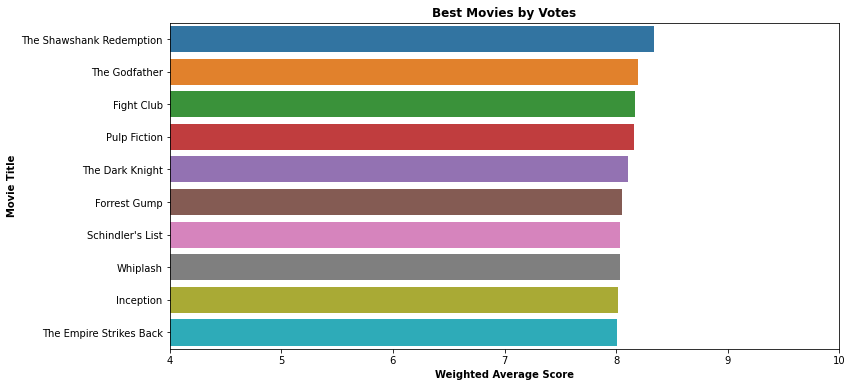

In [18]:
weight_avg = sorted_ranking.sort_values('weighted_avg', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = weight_avg['weighted_avg'].head(10), y=weight_avg['original_title'].head(10), data=weight_avg)
plt.xlim(4, 10)
plt.title("Best Movies by Votes", weight="bold")
plt.xlabel("Weighted Average Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [19]:
popularity = sorted_ranking.sort_values('popularity', ascending=False)
popularity.head(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
546,74000000,"[Family, Animation, Adventure, Comedy]",211672,"[assistant, aftercreditsstinger, duringcredits...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[UniversalPictures, IlluminationEntertainment]",[UnitedStatesofAmerica],2015-06-17,1156730962,91.0,"Before Gru, they had a history of bad bosses",6.4,4571,"[SandraBullock, JonHamm, MichaelKeaton, Alliso...",Kyle Balda,6.365286
95,165000000,"[Adventure, Drama, ScienceFiction]",157336,"[savingtheworld, artificialintelligence, fathe...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[ParamountPictures, LegendaryPictures, WarnerB...","[Canada, UnitedStatesofAmerica, UnitedKingdom]",2014-11-05,675120017,169.0,Mankind was born on Earth. It was never meant ...,8.1,10867,"[MatthewMcConaughey, JessicaChastain, AnneHath...",Christopher Nolan,7.998100
788,58000000,"[Action, Adventure, Comedy]",293660,"[antihero, mercenary, marvelcomic, superhero, ...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[TwentiethCenturyFoxFilmCorporation, MarvelEnt...",[UnitedStatesofAmerica],2016-02-09,783112979,108.0,Witness the beginning of a happy ending,7.4,10995,"[RyanReynolds, MorenaBaccarin, EdSkrein, T.J.M...",Tim Miller,7.334360
94,170000000,"[Action, ScienceFiction, Adventure]",118340,"[marvelcomic, spaceship, space, outerspace, or...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[MarvelStudios, MovingPictureCompany(MPC), Bul...","[UnitedKingdom, UnitedStatesofAmerica]",2014-07-30,773328629,121.0,All heroes start somewhere.,7.9,9742,"[ChrisPratt, ZoeSaldana, DaveBautista, VinDies...",James Gunn,7.798252
127,150000000,"[Action, Adventure, ScienceFiction, Thriller]",76341,"[future, chase, post-apocalyptic, dystopia, au...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[VillageRoadshowPictures, KennedyMillerProduct...","[Australia, UnitedStatesofAmerica]",2015-05-13,378858340,120.0,What a Lovely Day.,7.2,9427,"[TomHardy, CharlizeTheron, NicholasHoult, Hugh...",George Miller,7.135687
28,150000000,"[Action, Adventure, ScienceFiction, Thriller]",135397,"[monster, dna, tyrannosaurusrex, velociraptor,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[UniversalStudios, AmblinEntertainment, Legend...",[UnitedStatesofAmerica],2015-06-09,1513528810,124.0,The park is open.,6.5,8662,"[ChrisPratt, BryceDallasHoward, IrrfanKhan, ""V...",Colin Trevorrow,6.474365
199,140000000,"[Adventure, Fantasy, Action]",22,"[exoticisland, blacksmith, eastindiatradingcom...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[WaltDisneyPictures, JerryBruckheimerFilms]",[UnitedStatesofAmerica],2003-07-09,655011224,143.0,Prepare to be blown out of the water.,7.5,6985,"[JohnnyDepp, GeoffreyRush, OrlandoBloom, Keira...",Gore Verbinski,7.391892
82,170000000,"[ScienceFiction, Action, Drama, Thriller]",119450,"[leader, colony, post-apocalyptic, dystopia, f...",en,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243.791743,"[IngeniousMedia, CherninEntertainment, TSGEnte...",[UnitedStatesofAmerica],2014-06-26,710644566,130.0,One last chance for peace.,7.3,4410,"[AndySerkis, JasonClarke, GaryOldman, KeriRuss...",Matt Reeves,7.159397
200,125000000,"[ScienceFiction, Adventure, Thriller]",131631,"[resistance, post-apocalyptic, dystopia, war, ...",en,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206.227151,"[Lionsgate, ColorForce]",[UnitedStatesofAmerica],2014-11-18,752100229,123.0,Fire burns brighter in the darkness,6.6,5584,"[JenniferLawrence, JoshHutcherson, LiamHemswor...",Francis Lawrenc

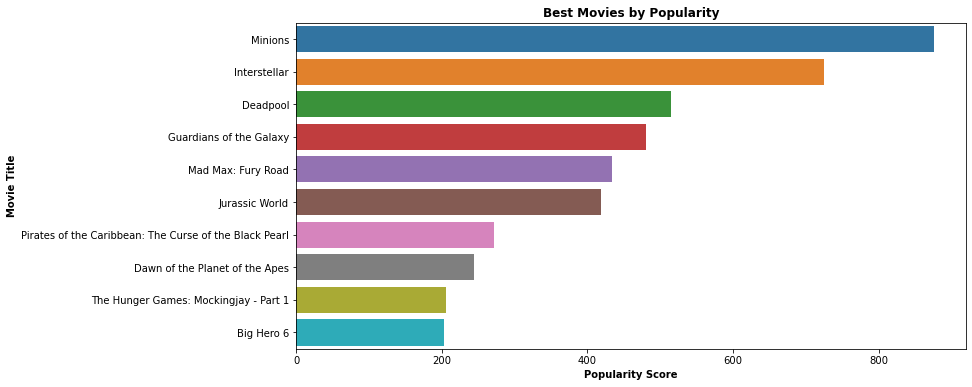

In [20]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)
plt.title("Best Movies by Popularity", weight="bold")
plt.xlabel("Popularity Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

## Recommendations based on both Popularity Score and Weighted Avg(both 50% priority)

In [21]:
# Scaling down the Popularity Score and Weighted Average due to difference in magnitude
scaling = MinMaxScaler()
movie_scaled = scaling.fit_transform(movies_cleaned[['weighted_avg', 'popularity']])
movie_normalized = pd.DataFrame(movie_scaled, columns=['weighted_avg', 'popularity'])
movie_normalized.head()

,weighted_avg,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [22]:
movies_cleaned[['normalized_weighted_avg', 'normalized_popularity']] = movie_normalized
movies_cleaned.head(20)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg,normalized_weighted_avg,normalized_popularity
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",...,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,7.148013,0.674339,0.171815
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[UnitedStatesofAmerica],...,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,6.807627,0.581403,0.158846
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[UnitedKingdom, UnitedStatesofAmerica]",...,880674609,148.0,A Plan No One Escapes,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,6.276075,0.436273,0.122635
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[UnitedStatesofAmerica],...,1084939099,165.0,The Legend Ends,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,7.509565,0.773054,0.128272
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[UnitedStatesofAmerica],...,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,6.098319,0.387739,0.050169
5,258000000,"[Fantasy, Action, Adventure]",559,"[dualidentity, amnesia, sandstorm, ""loveofones...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[ColumbiaPictures, LauraZiskinProductions, Mar...",[UnitedStatesofAmerica],...,890871626,139.0,The battle within.,5.9,3576,"[TobeyMaguire, KirstenDunst, JamesFranco, Thom...",Sam Raimi,5.926859,0.340926,0.132141
6,260000000,"[Animation, Family]",38757,"[hostage, magic, horse, fairytale, musical, pr...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[WaltDisneyPictures, WaltDisneyAnimationStudios]",[UnitedStatesofAmerica],...,591794936,100.0,They're taking adventure to new lengths.,7.4,3330,"[ZacharyLevi, MandyMoore, DonnaMurphy, RonPerl...",Byron Howard,7.205715,0.690093,0.055600
7,280000000,"[Action, Adventure, ScienceFiction]",99861,"[marvelcomic, sequel, superhero, basedoncomicb...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[MarvelStudios, PrimeFocus, RevolutionSunStudios]",[UnitedStatesofAmerica],...,1405403694,141.0,A New Age Has Come.,7.3,6767,"[RobertDowneyJr., ChrisHemsworth, MarkRuffalo,...",Joss Whedon,7.204498,0.689761,0.153360
8,250000000,"[Adventure, Fantasy, Family]",767,"[witch, magic, broom, schoolofwitchcraft, wiza...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[WarnerBros., HeydayFilms]","[UnitedKingdom, UnitedStatesofAmerica]",...,933959197,153.0,Dark Secrets Revealed,7.4,5293,"[DanielRadcliffe, RupertGrint, EmmaWatson, Tom...",David Yates,7.270642,0.707820,0.112937
9,250000000,"[Action, Adventure, Fantasy]",209112,"[dcco

In [23]:
movies_cleaned['score'] = movies_cleaned['normalized_weighted_avg'] * 0.5 + movies_cleaned['normalized_popularity'] * 0.5
movies_cleaned = movies_cleaned.sort_values(['score'], ascending=False)
movies_cleaned[['original_title','normalized_weighted_avg', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weighted_avg,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


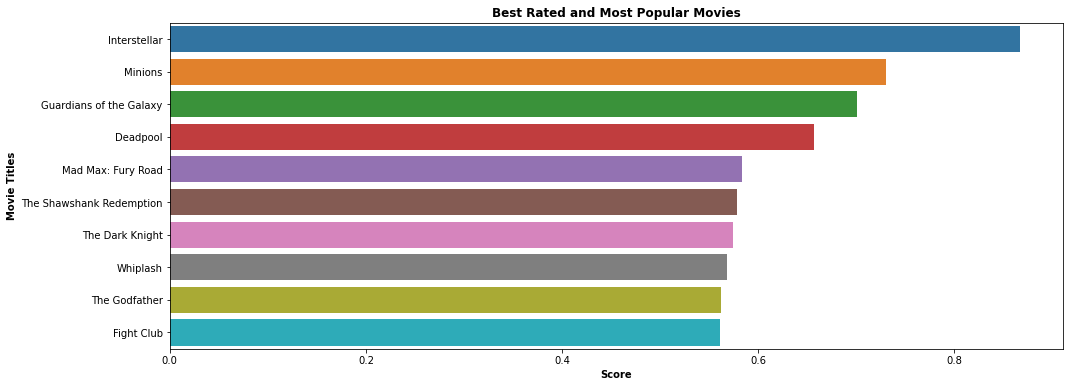

In [24]:
movies_score = movies_cleaned.sort_values('score', ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x = movies_score['score'].head(10), y=movies_score['original_title'].head(10), data=movies_score)
plt.title("Best Rated and Most Popular Movies", weight="bold")
plt.xlabel("Score", weight="bold")
plt.ylabel("Movie Titles", weight="bold")
plt.show()

# Recommender System using Correlation Concept (Movielens Dataset)

In [25]:
df = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [26]:
df.shape

(20000263, 4)

In [27]:
# Using smaller amount of data => otherwise pandas gives error => pivot_table on large data does not work, int32 overflow
df = df[:100003]
df.shape

(100003, 4)

In [28]:
titles = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
# Merge the ratings and movies dataframe
df = pd.merge(df, titles, on="movieId")
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


In [30]:
# Sort the rating from highest to lowest based on the rating value
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
World of Henry Orient, The (1964)                    5.0
Cyclo (Xich lo) (1995)                               5.0
Jesus (1979)                                         5.0
Live Forever (2003)                                  5.0
Alice in the Cities (Alice in den Stadten) (1974)    5.0
Name: rating, dtype: float64

In [31]:
# Sort based on the count of number of ratings given to the movies
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 350
Forrest Gump (1994)                 340
Shawshank Redemption, The (1994)    305
Jurassic Park (1993)                302
Silence of the Lambs, The (1991)    295
Name: rating, dtype: int64

In [32]:
# Storing the mean values of the ratings for each movie
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Hellboy': The Seeds of Creation (2004),2.500000
'Neath the Arizona Skies (1934),3.500000
'Round Midnight (1986),4.000000
'Til There Was You (1997),2.333333
"'burbs, The (1989)",3.250000


In [33]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Hellboy': The Seeds of Creation (2004),2.500000,1
'Neath the Arizona Skies (1934),3.500000,1
'Round Midnight (1986),4.000000,1
'Til There Was You (1997),2.333333,3
"'burbs, The (1989)",3.250000,14


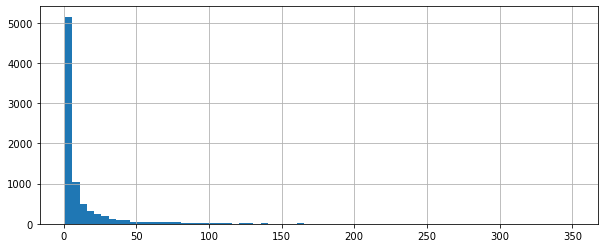

In [34]:
# Plot histogram wrt number of ratings
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=70)

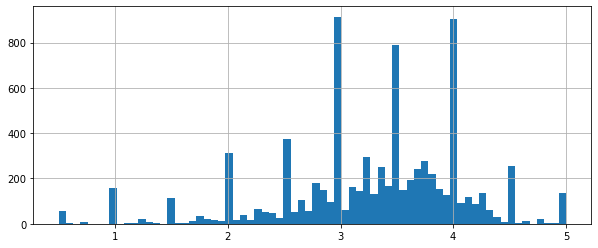

In [35]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)    # Follow normal Gaussian Distribution with some outliers

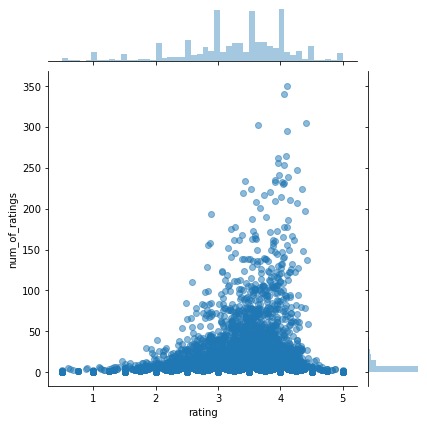

In [36]:
sns.jointplot(x='rating', y='num_of_ratings', data=ratings, alpha=0.5)

In [37]:
ratings.sort_values('num_of_ratings', ascending=False).head(10)

,rating,num_of_ratings
title,,
Pulp Fiction (1994),4.100000,350
Forrest Gump (1994),4.058824,340
"Shawshank Redemption, The (1994)",4.413115,305
Jurassic Park (1993),3.639073,302
"Silence of the Lambs, The (1991)",4.111864,295
Star Wars: Episode IV - A New Hope (1977),4.083333,264
Braveheart (1995),3.965649,262
Terminator 2: Judgment Day (1991),3.953125,256
"Matrix, The (1999)",4.063241,253


In [38]:
moviemat = df.pivot_table(index="userId", columns="title", values='rating')
moviemat.head()

title,'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...And Justice for All (1979),...,Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
forrest_gump_user_ratings = moviemat['Forrest Gump (1994)']
shawshank_user_ratings = moviemat['Shawshank Redemption, The (1994)']

forrest_gump_user_ratings.head()

userId
1    NaN
2    NaN
3    NaN
4    4.0
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [40]:
shawshank_user_ratings.head()

userId
1    4.0
2    NaN
3    5.0
4    NaN
5    5.0
Name: Shawshank Redemption, The (1994), dtype: float64

In [41]:
# Find correlations
similar_forrest_gump = moviemat.corrwith(forrest_gump_user_ratings)
similar_shawshank = moviemat.corrwith(shawshank_user_ratings)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [42]:
similar_forrest_gump.head()

title
'Hellboy': The Seeds of Creation (2004)         NaN
'Neath the Arizona Skies (1934)                 NaN
'Round Midnight (1986)                          NaN
'Til There Was You (1997)                  1.000000
'burbs, The (1989)                        -0.389294
dtype: float64

In [43]:
similar_shawshank.head()

title
'Hellboy': The Seeds of Creation (2004)         NaN
'Neath the Arizona Skies (1934)                 NaN
'Round Midnight (1986)                          NaN
'Til There Was You (1997)                  0.500000
'burbs, The (1989)                        -0.389249
dtype: float64

In [44]:
# Drop 'NaN' values and convert the correlations to a dataframe
# Higher Correlation => first recommendation
# Max Correlation = 1
corr_forrest_gump = pd.DataFrame(similar_forrest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",-0.389294
(500) Days of Summer (2009),0.387228
*batteries not included (1987),0.784857
...And Justice for All (1979),-0.104447


In [45]:
corr_forrest_gump.shape

(4573, 1)

In [46]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(20)

,Correlation
title,
'Til There Was You (1997),1.0
Twin Falls Idaho (1999),1.0
Blue Sky (1994),1.0
True Believer (1989),1.0
Party Monster (2003),1.0
"Truly, Madly, Deeply (1991)",1.0
Junebug (2005),1.0
Just My Luck (2006),1.0
Twentynine Palms (2003),1.0


In [47]:
corr_shawshank = pd.DataFrame(similar_shawshank, columns=['Correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

,Correlation
title,
'Til There Was You (1997),0.500000
"'burbs, The (1989)",-0.389249
(500) Days of Summer (2009),0.140018
*batteries not included (1987),-0.083045
...And Justice for All (1979),0.259437


In [48]:
corr_shawshank.shape

(4408, 1)

In [49]:
corr_shawshank.sort_values('Correlation', ascending=False).head(20)

,Correlation
title,
"Three Musketeers, The (1973)",1.0
True Believer (1989),1.0
Sleuth (2007),1.0
Tremors 3: Back to Perfection (2001),1.0
Meteor (1979),1.0
"Christmas Carol, A (Scrooge) (1951)",1.0
Human Nature (2001),1.0
Cradle Will Rock (1999),1.0
Booty Call (1997),1.0


For higher values of correlations, the number of ratings may be very less. So we will consider only those correlations where number of ratings is >100

In [50]:
corr_forrest_gump = corr_forrest_gump.join(ratings['num_of_ratings'])
corr_forrest_gump.head(10)

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",-0.389294,14
(500) Days of Summer (2009),0.387228,26
*batteries not included (1987),0.784857,6
...And Justice for All (1979),-0.104447,7
10 (1979),-1.000000,3
10 Things I Hate About You (1999),0.200577,46
"10,000 BC (2008)",0.584202,9
100 Girls (2000),1.000000,3


In [51]:
corr_shawshank = corr_shawshank.join(ratings['num_of_ratings'])
corr_shawshank.head(10)

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.500000,3
"'burbs, The (1989)",-0.389249,14
(500) Days of Summer (2009),0.140018,26
*batteries not included (1987),-0.083045,6
...And Justice for All (1979),0.259437,7
10 (1979),1.000000,3
10 Things I Hate About You (1999),-0.054926,46
"10,000 BC (2008)",0.232495,9
101 Dalmatians (1996),0.135652,41


### Movie Recommandations for "Forrest Gump"

In [52]:
# Considering correlations where number of ratings>100
corr_forrest_gump[corr_forrest_gump['num_of_ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
title,,
Forrest Gump (1994),1.000000,340
"Green Mile, The (1999)",0.546064,104
Pretty Woman (1990),0.480608,172
E.T. the Extra-Terrestrial (1982),0.449722,158
"Beautiful Mind, A (2001)",0.427354,107
While You Were Sleeping (1995),0.417521,124
Saving Private Ryan (1998),0.406105,186
"Monsters, Inc. (2001)",0.400703,111
Babe (1995),0.397104,163


### Movie Recommendations for Shawshank Redemption

In [53]:
corr_shawshank[corr_shawshank['num_of_ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,305
"Green Mile, The (1999)",0.521321,104
Saving Private Ryan (1998),0.427346,186
One Flew Over the Cuckoo's Nest (1975),0.425176,148
Casablanca (1942),0.404457,122
Gladiator (2000),0.388624,154
Braveheart (1995),0.381677,262
"Hunt for Red October, The (1990)",0.369724,109
Ghost (1990),0.364414,150


### 3 Types of Recommender Systems:
> Collaborative Filtering => Recommend based on items bought by User (Same recommendations if two persons buy same product)<br>
> Content-Based Filtering => Focus completely on Content (Same recommendations to two persons if both give same rating to an article)<br>
> Hybrid Filtering (Combining Collaborative and Content-Based)

# Recommender System using K Nearest Neighbors based Collaborative Filtering (Movielens Dataset)

In [54]:
movies = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv", usecols=['movieId','title'],
                    dtype={'movieId':'int32', 'title': 'str'})
ratings = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv", usecols=['userId', 'movieId', 'rating'],
                     dtype={'userId':'int32', 'movieId':'int32', 'rating':'float32'})

In [55]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [56]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [57]:
df = pd.merge(movies, ratings, on="movieId")
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [58]:
# Count Ratings for each and every movie
ratings = df.dropna(axis=0, subset = ['title'])    # Drop all 'NaN' values
movie_rating_Count = (ratings.groupby(by=['title'])['rating'].count().reset_index().
                     rename(columns = {'rating':'TotalRatingCount'})[['title', 'TotalRatingCount']])

movie_rating_Count.head(10)

,title,TotalRatingCount
0,#chicagoGirl: The Social Network Takes on a Di...,3
1,$ (Dollars) (1971),24
2,$5 a Day (2008),39
3,$9.99 (2008),55
4,$ellebrity (Sellebrity) (2012),2
5,'71 (2014),35
6,'Hellboy': The Seeds of Creation (2004),87
7,"'Human' Factor, The (Human Factor, The) (1975)",2
8,'Neath the Arizona Skies (1934),22
9,'R Xmas (2001),19


In [59]:
movie_rating_Count.describe()

,TotalRatingCount
count,26729.000000
mean,748.260803
std,3086.673456
min,1.000000
25%,3.000000
50%,18.000000
75%,205.000000
max,67310.000000


In [60]:
# Merging the rating counts with the ratings
ratings = ratings.merge(movie_rating_Count, left_on='title', right_on='title', how='left')
# left_on => on left dataframe which column considered, right_on => on right dataframe which column considered
ratings.head()

,movieId,title,userId,rating,TotalRatingCount
0,1,Toy Story (1995),3,4.0,49695
1,1,Toy Story (1995),6,5.0,49695
2,1,Toy Story (1995),8,4.0,49695
3,1,Toy Story (1995),10,4.0,49695
4,1,Toy Story (1995),11,4.5,49695


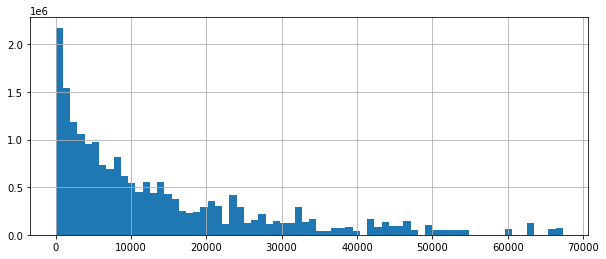

In [61]:
plt.figure(figsize=(10,4))
ratings['TotalRatingCount'].hist(bins=70)

In [62]:
popularity_threshold = 10000
rating_popular_movie = ratings.query('TotalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,movieId,title,userId,rating,TotalRatingCount
0,1,Toy Story (1995),3,4.0,49695
1,1,Toy Story (1995),6,5.0,49695
2,1,Toy Story (1995),8,4.0,49695
3,1,Toy Story (1995),10,4.0,49695
4,1,Toy Story (1995),11,4.5,49695


In [63]:
rating_popular_movie.shape

(9050403, 5)

In [64]:
s = set(rating_popular_movie['title'])
s

{'10 Things I Hate About You (1999)',
 '12 Angry Men (1957)',
 '2001: A Space Odyssey (1968)',
 '28 Days Later (2002)',
 '300 (2007)',
 'A.I. Artificial Intelligence (2001)',
 'Abyss, The (1989)',
 'Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Addams Family Values (1993)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'African Queen, The (1951)',
 'Air Force One (1997)',
 'Airplane! (1980)',
 'Aladdin (1992)',
 'Alien (1979)',
 'Alien: Resurrection (1997)',
 'Aliens (1986)',
 'Alien³ (a.k.a. Alien 3) (1992)',
 'Almost Famous (2000)',
 'Amadeus (1984)',
 "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",
 'American Beauty (1999)',
 'American History X (1998)',
 'American Pie (1999)',
 'American President, The (1995)',
 'Animal House (1978)',
 'Annie Hall (1977)',
 'Antz (1998)',
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Arachnophobia (1990)',
 'Armageddon (1998)',
 'Army of Darkness (1993)',
 'As Good as It Gets (1997)',
 'A

In [65]:
# Create a Pivot Table
features = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)
features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,138484,138485,138486,138487,138488,138489,138490,138491,138492,138493
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,4.0
2001: A Space Odyssey (1968),3.5,5.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Days Later (2002),3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5


In [66]:
# Convert the pivot_table into an array matrix
from scipy.sparse import csr_matrix
features_matrix = csr_matrix(features.values)    # All info of pivot table converted into an array
features_matrix

<462x137658 sparse matrix of type '<class 'numpy.float32'>'
	with 9050398 stored elements in Compressed Sparse Row format>

#### Using Cosine Similarity

> similarity(A, B) = cos(theta) = (A.B) / (||A|| * ||B||) => [Dot Product of the vectors/Product of magnitudes of vector]<br>
> theta = angle between the two vectors A and B<br>
> Cos(0) => similarity = 1<br>
> Cos(90) => similarity = 0<br>
> Cos(45) => similarity = 0.5

###### We will use KNN along with cosine similarity as KNN works on the concept of Euclidean Distance

In [67]:
from sklearn.neighbors import NearestNeighbors   # Not KNearestNeighbors, NearestNeighbors => Unsupervised Algo
model = NearestNeighbors(metric = "cosine", algorithm="brute")
model.fit(features_matrix)    # p=2 => Euclidean Distance Parameter

NearestNeighbors(algorithm='brute', metric='cosine')

In [68]:
features.shape

(462, 137658)

In [69]:
# Taking a new movie at random
query_index = np.random.choice(features.shape[0])    # Collect 1 record
print(query_index)

185


In [70]:
# Find similar movies(nearer to the selected movie) using kneighbors
distances, indices = model.kneighbors(features.iloc[query_index,:].values.reshape(1, -1), n_neighbors=6)
# n_neighbors = 6 => will include the movie itself => We will be getting 5 other movie recommendations

In [71]:
# distances = 0 => Same movie itself
distances

array([[0.       , 0.5289951, 0.5391087, 0.5689115, 0.575049 , 0.5839466]],
      dtype=float32)

In [72]:
indices

array([[185, 456,  80, 191, 224,  11]])

In [73]:
# Print top 5 movie name recommendations for movie along with the distances from original movie
for i in range(0, len(distances.flatten())):     # Convert 'distances' array into 1-D array
    if(i==0):
        print("Recommendations for {0}:\n".format(features.index[query_index]))    # 1st recommendation => same movie itself
    else:
        print("{0}: {1}, with distance of {2}:".format(i, features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Gone with the Wind (1939):

1: Wizard of Oz, The (1939), with distance of 0.5289950966835022:
2: Casablanca (1942), with distance of 0.5391086935997009:
3: Graduate, The (1967), with distance of 0.5689114928245544:
4: It's a Wonderful Life (1946), with distance of 0.5750489830970764:
5: African Queen, The (1951), with distance of 0.5839465856552124:
